In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('temperature.csv')
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E


In [3]:
df.drop(columns = ['record_id', 'day', 'month'], inplace = True)

In [4]:
df.fillna(df.mean())

,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
1,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
2,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
3,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
4,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
...,...,...,...,...,...,...,...,...
48465,2013,55.054400,32.489600,Wroclaw,POL,Poland,50.63N,16.48E
48466,2013,61.167200,32.333000,Wroclaw,POL,Poland,50.63N,16.48E
48467,2013,66.770600,32.570600,Wroclaw,POL,Poland,50.63N,16.48E
48468,2013,64.565600,32.484200,Wroclaw,POL,Poland,50.63N,16.48E


**Data cleaning:** Record_id was not really necessary to what we need so we decided to drop that column entirely. There were also missing values, so we decided to fill them with the average (mean) values since most of the values were around each other.

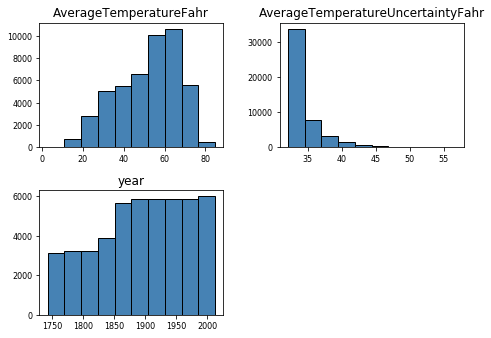

In [5]:
#Histogram
df.hist(color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

As can be seen from the above **histogram**, the average temperature in fahrenheit seems to increases with the year. 

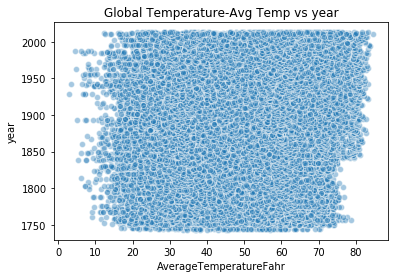

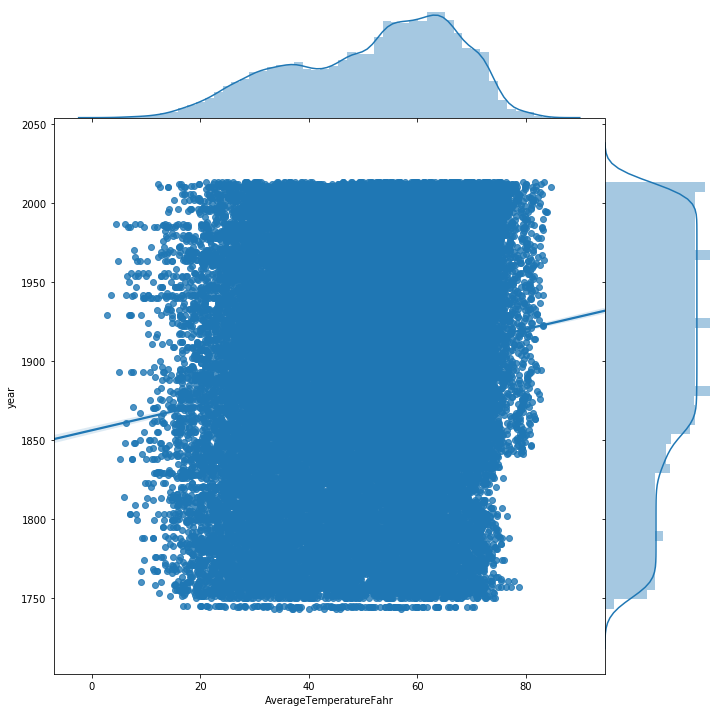

In [6]:
#scatter plots

plt.scatter(df['AverageTemperatureFahr'], df['year'],
            alpha=0.4, edgecolors='w')

plt.xlabel('AverageTemperatureFahr')
plt.ylabel('year')
plt.title('Global Temperature-Avg Temp vs year')


# Joint Plot
jp = sns.jointplot(x='AverageTemperatureFahr', y='year', data=df,
                   kind='reg', space=0, height=10)


From the above scatter plot and joint plot, one can see that the teperature has been more consistently higher when the years increased. The graph seems to be a bit skewed to the left. In the joint plot, you can see a steady increase in temperature as the years increase as well.

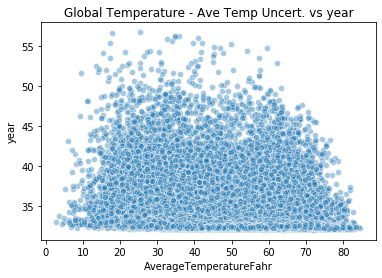

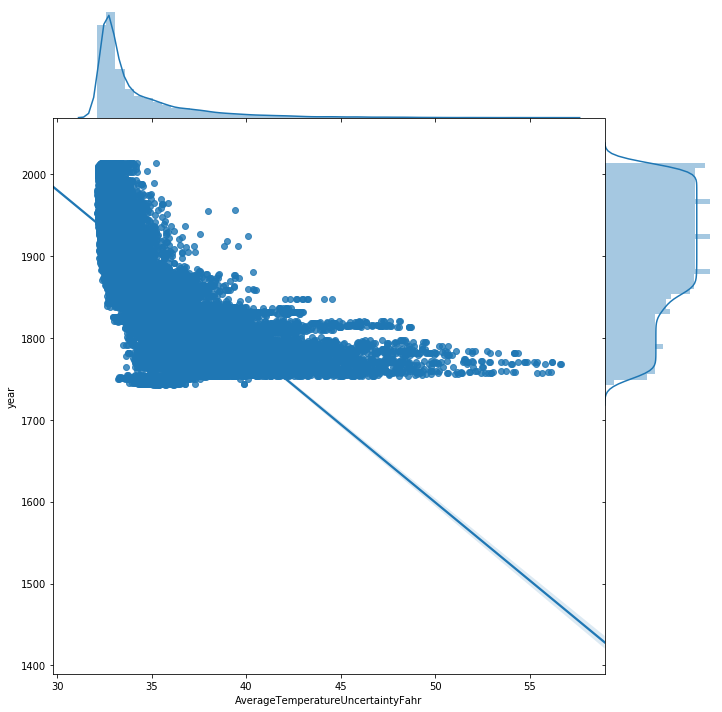

In [7]:
plt.scatter(df['AverageTemperatureFahr'], df['AverageTemperatureUncertaintyFahr'],
            alpha=0.4, edgecolors='w')

plt.xlabel('AverageTemperatureFahr')
plt.ylabel('year')
plt.title('Global Temperature - Ave Temp Uncert. vs year')

# Joint Plot
jp = sns.jointplot(x='AverageTemperatureUncertaintyFahr', y='year', data=df,
                   kind='reg', space=0, height=10)

Obviously the uncertainty of temperature is greater as the years decrease since proper temperature is harder to record from around the 1800s compared to the technology we have now to get proper readings of temperature. The graph is also skewed right in this instance. 

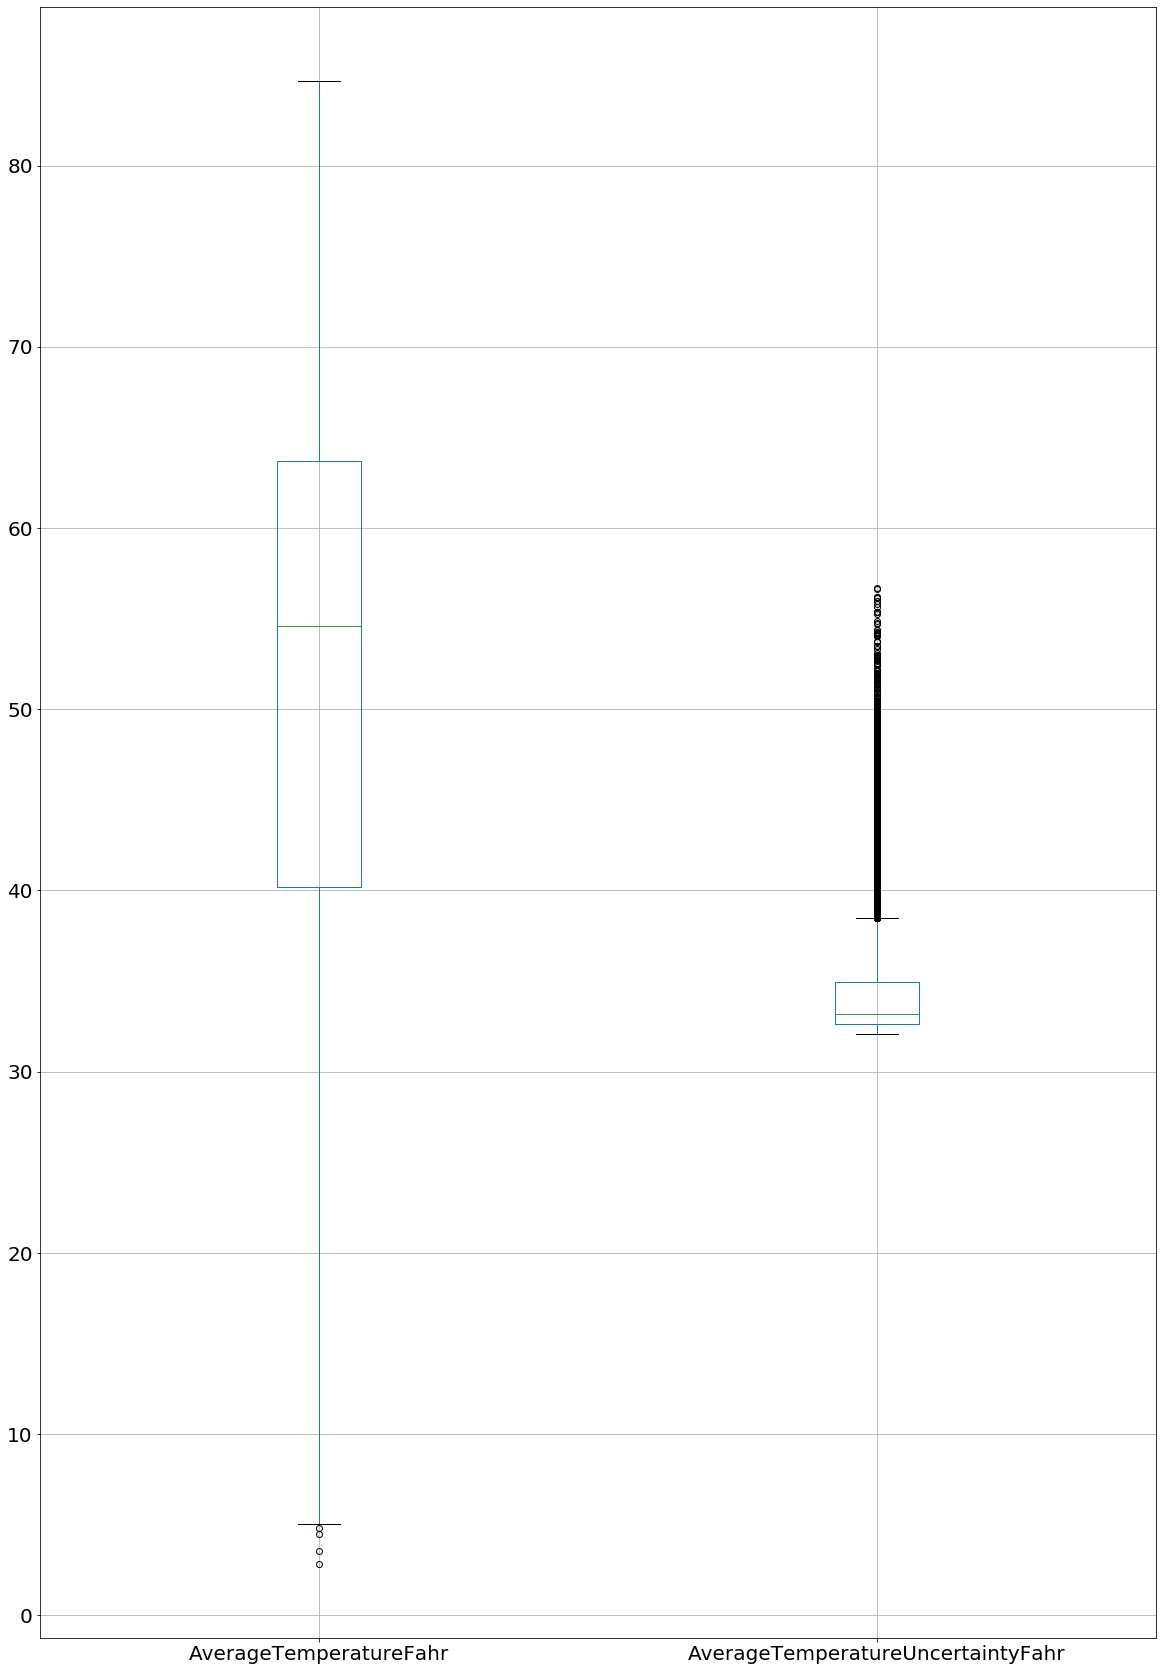

In [8]:
#Box plot
#f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
#f.suptitle('Global Temperature', fontsize=14)

#sns.boxplot(x="AverageTemperatureFahr", y="year", data=df,  ax=ax)
#ax.set_xlabel("AverageTemperatureFahr",size = 12,alpha=0.8)
#ax.set_ylabel("year",size = 12,alpha=0.8)

#df = pd.DataFrame(columns = ['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr, year'])
boxplot = df.boxplot(column = ['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr'], fontsize = 20, figsize = (20,30))


From the boxplot, the mean is around 55 for the average temperature fahrenheit, while the uncertainty mean is about 35. Focusing primarily on the left boxplot, the lowest temperature average has been below 10 degrees fahrenheit while the highest has been 85+.